# <center> What is Pandas? </center>
<center><img src="https://pandas.pydata.org/_static/pandas_logo.png"></center>
- Open source library 
- High-performance : Only constraint is RAM
- Easy-to-use data structures
- Data analysis tools

# Reading data

In [8]:
import pandas as pd # This is only a convention
import numpy as np

In [18]:
sales_data = pd.read_csv('data/blooth_sales_data.csv')
sales_data

,name,birthday,customer,orderdate,product,units,unitprice
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.156566,Thriller record,2,13.27
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.156596,Corolla,26,24458.69
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.156618,Rubik’s Cube,41,15.79
3,Cori,1986-11-05,Signal Industries,2016-07-23 13:48:03.156638,iPhone,16,584.01
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.156657,Harry Potter book,4,25.69
5,Weldon,1953-03-17,Network Application Co,2016-07-22 13:48:03.156678,Lipitor,1,11.22
6,Sung,1977-10-23,Omega Pacific Future Incorporated,2016-07-09 13:48:03.156698,PlayStation,25,294.90
7,Emily,1982-07-02,Medicine Incorporated,2016-07-16 13:48:03.156717,Thriller record,5,18.27
8,Cornell,1963-07-02,Technology Direct Star Limited,2016-07-08 13:48:03.156735,Rubik’s Cube,35,15.98
9,Ervin,1977-10-14,Provider Agency,2016-07-19 13:48:03.156754,Star Wars,24,11.50


- Sometimes the encoding is off and gives an error
- Overcome using the encoding = 'latin-1' parameter --- Works most of the time

### Let's explore our data set

In [6]:
pd.set_option('display.max_rows', 10000)  # change presets for data preview
sales_data

,name,birthday,customer,orderdate,product,units,unitprice
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.156566,Thriller record,2,13.27
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.156596,Corolla,26,24458.69
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.156618,Rubik’s Cube,41,15.79
3,Cori,1986-11-05,Signal Industries,2016-07-23 13:48:03.156638,iPhone,16,584.01
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.156657,Harry Potter book,4,25.69
5,Weldon,1953-03-17,Network Application Co,2016-07-22 13:48:03.156678,Lipitor,1,11.22
6,Sung,1977-10-23,Omega Pacific Future Incorporated,2016-07-09 13:48:03.156698,PlayStation,25,294.90
7,Emily,1982-07-02,Medicine Incorporated,2016-07-16 13:48:03.156717,Thriller record,5,18.27
8,Cornell,1963-07-02,Technology Direct Star Limited,2016-07-08 13:48:03.156735,Rubik’s Cube,35,15.98
9,Ervin,1977-10-14,Provider Agency,2016-07-19 13:48:03.156754,Star Wars,24,11.50


In [4]:
pd.reset_option('display.max_rows')

#### Inspect your DataFrame with pandas methods

In [5]:
sales_data.head()

,name,birthday,customer,orderdate,product,units,unitprice
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.156566,Thriller record,2,13.27
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.156596,Corolla,26,24458.69
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.156618,Rubik’s Cube,41,15.79
3,Cori,1986-11-05,Signal Industries,2016-07-23 13:48:03.156638,iPhone,16,584.01
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.156657,Harry Potter book,4,25.69


In [6]:
sales_data.tail()

,name,birthday,customer,orderdate,product,units,unitprice
995,Ethan,1952-12-08,Application Industries,2016-07-21 13:48:03.177885,Harry Potter book,39,24.40
996,Rudolph,1959-10-15,Network Software West Inc,2016-07-19 13:48:03.177903,Rubik’s Cube,9,15.11
997,Annmarie,1982-06-04,Atlantic Corporation,2016-07-13 13:48:03.177924,Thriller record,19,9.16
998,Chang,1984-02-05,Venture Alpha Corporation,2016-07-13 13:48:03.177943,Harry Potter book,24,28.21
999,Ervin,1977-10-14,Provider Agency,2016-07-09 13:48:03.177962,iPhone,39,663.83


In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
name         1000 non-null object
birthday     1000 non-null object
customer     1000 non-null object
orderdate    1000 non-null object
product      1000 non-null object
units        1000 non-null int64
unitprice    1000 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


## Can specify multiple options

In [8]:
data2 = pd.read_csv('data/blooth_sales_data_2.csv')
data2.head()

,name;birthday;customer;orderdate;product;units;unitprice
Renita;1992-09-30;Industries International;2016-10-07 09:14:17.476376;Harry Potter book;44;17,74
Dominick;1979-07-26;Solutions Co;2016-10-09 09:14:17.476409;banana;33;10,0
Sasha;1986-05-08;Power LLC;2016-10-19 09:14:17.476433;Harry Potter book;39;15,58
Duncan;1958-07-04;Research Net Co;2016-10-09 09:14:17.476455;Corolla;48;24609,93
Frederick;1983-07-24;Building Max East Inc;2016-10-09 09:14:17.476476;Rubik’s Cube;21;16,73


In [10]:
data2 = pd.read_csv('data/blooth_sales_data_2.csv', 
                    sep=';', 
                    decimal=',', 
                    parse_dates=['birthday', 'orderdate'], # Parsing dates
                   dayfirst=True) # Change from American format
data2.head()

,name,birthday,customer,orderdate,product,units,unitprice
0,Renita,1992-09-30,Industries International,2016-10-07 09:14:17.476376,Harry Potter book,44,17.74
1,Dominick,1979-07-26,Solutions Co,2016-10-09 09:14:17.476409,banana,33,10.00
2,Sasha,1986-05-08,Power LLC,2016-10-19 09:14:17.476433,Harry Potter book,39,15.58
3,Duncan,1958-07-04,Research Net Co,2016-10-09 09:14:17.476455,Corolla,48,24609.93
4,Frederick,1983-07-24,Building Max East Inc,2016-10-09 09:14:17.476476,Rubik’s Cube,21,16.73


## Many, many, MANY more options

<a href = r'https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html'> Documentation for read csv </a>

## Other reading options
- JSON
- SQL
- Dictionary
- SAS
- Stata
- Excel
- Even from the clipboard

In [13]:
# JSON - Java Script Object Notation
sales_data_json = pd.read_json('data/blooth_sales_data.json')
sales_data_json.head(5)

,birthday,customer,name,orderdate,product,unitprice,units
0,1974-01-07,Frontier Industries,Ernesto,2016-10-06 08:21:20.544568,Star Wars,11.81,27
1,1986-02-05,Bell Telecom Limited,Queen,2016-09-30 08:21:20.544599,PlayStation,284.71,1
2,1982-07-06,Software Co,Reid,2016-10-05 08:21:20.544622,banana,10.00,49
3,1971-04-12,Data Design Galaxy Co,Arlene,2016-10-02 08:21:20.544643,Thriller record,16.77,48
4,1984-12-14,Frontier Inc,Nikita,2016-10-16 08:21:20.544666,Harry Potter book,5.65,4


In [15]:
import json
with open('data/blooth_sales_data.json', 'r') as f:
    _json = json.load(f)
_json[0]

{'birthday': '1974-01-07',
 'customer': 'Frontier Industries',
 'name': 'Ernesto',
 'orderdate': '2016-10-06 08:21:20.544568',
 'product': 'Star Wars',
 'unitprice': 11.81,
 'units': 27}

In [17]:
# From Python dictionary
sales_data_from_dict = pd.DataFrame(_json)
sales_data_from_dict.head(5)

,birthday,customer,name,orderdate,product,unitprice,units
0,1974-01-07,Frontier Industries,Ernesto,2016-10-06 08:21:20.544568,Star Wars,11.81,27
1,1986-02-05,Bell Telecom Limited,Queen,2016-09-30 08:21:20.544599,PlayStation,284.71,1
2,1982-07-06,Software Co,Reid,2016-10-05 08:21:20.544622,banana,10.00,49
3,1971-04-12,Data Design Galaxy Co,Arlene,2016-10-02 08:21:20.544643,Thriller record,16.77,48
4,1984-12-14,Frontier Inc,Nikita,2016-10-16 08:21:20.544666,Harry Potter book,5.65,4


In [1]:
# From Excel
sales_data_excel = pd.read_excel('data/blooth_sales_data.xlsx')
sales_data_excel.head(5)

NameError: name 'pd' is not defined

# Writing to File

In [3]:
# Same as read but instead of read, use to
sales_data.to_csv('data/blooth_sales_data_write.csv')

NameError: name 'sales_data' is not defined

In [81]:
# Some useful commands to remember
# - index = False : adds extra column for index
# - header 

# Data selection & Indexing

In [24]:
import numpy as np
import random

In [25]:
series = pd.Series([3, 62, 75, 83, 47, 43, 39, 16, 19, 2])
series

0     3
1    62
2    75
3    83
4    47
5    43
6    39
7    16
8    19
9     2
dtype: int64

### Access by Position / Slice

In [26]:
series[0]

3

In [27]:
series[3:6]

3    83
4    47
5    43
dtype: int64

In [29]:
series.iloc[3:6]
# note [] not ()!

3    83
4    47
5    43
dtype: int64

### Access by label

In [31]:
# set alpha label as new index for the series
series.index = [x for x in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"][:len(series)]
series

A     3
B    62
C    75
D    83
E    47
F    43
G    39
H    16
I    19
J     2
dtype: int64

In [32]:
series['D':'F']

D    83
E    47
F    43
dtype: int64

In [33]:
series[['D':'F', 'I':'J']]
# cannot combine multiple ranges

SyntaxError: invalid syntax (<ipython-input-33-9a6e77a410bd>, line 1)

In [34]:
pd.concat([series['D':'F'], series['I':'J']])
# concat to combine multiple ranges

D    83
E    47
F    43
I    19
J     2
dtype: int64

In [36]:
# set alpha label as new index for the series
series.index = [x for x in "GATTACAXYZ"][:len(series)]
series

G     3
A    62
T    75
T    83
A    47
C    43
A    39
X    16
Y    19
Z     2
dtype: int64

In [37]:
# non-unique values breaks slicing
series.loc['G':'A']

KeyError: "Cannot get right slice bound for non-unique label: 'A'"

# DataFrames

In [5]:
df = pd.read_json('data/sampledf.json')
df

,0,1,2,3,4,5,6,7,8,9
0,79,19,21,99,35,59,44,25,75,58
1,25,39,89,66,9,41,6,69,63,3
2,37,64,31,69,61,97,5,11,76,57
3,74,61,100,6,58,80,95,50,15,51
4,79,60,83,85,16,5,16,69,5,20
5,45,26,73,73,100,60,21,19,95,12
6,12,29,18,98,62,68,92,29,74,96
7,36,32,22,4,66,25,63,51,59,14
8,55,53,89,13,84,87,74,3,2,64
9,46,74,36,54,21,12,68,33,80,25


In [42]:
# column
df[2]

0     21
1     89
2     31
3    100
4     83
5     73
6     18
7     22
8     89
9     36
Name: 2, dtype: int64

In [44]:
# row
df[2:4]

,0,1,2,3,4,5,6,7,8,9
2,37,64,31,69,61,97,5,11,76,57
3,74,61,100,6,58,80,95,50,15,51


In [46]:
# iloc - by index
# row, column
df.iloc[2:4, 2:4]

,2,3
2,31,69
3,100,6


In [48]:
# Column slice
df.iloc[:, 2:4]

,2,3
0,21,99
1,89,66
2,31,69
3,100,6
4,83,85
5,73,73
6,18,98
7,22,4
8,89,13
9,36,54


In [49]:
# Row slice
df.iloc[2:4,:]

,0,1,2,3,4,5,6,7,8,9
2,37,64,31,69,61,97,5,11,76,57
3,74,61,100,6,58,80,95,50,15,51


In [6]:
# Selecting by name
df.index = ["R{:02d}".format(i) for i in range(len(df))]
df.columns = ["C{:02d}".format(i) for i in range(len(df.columns))]
df

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09
R00,79,19,21,99,35,59,44,25,75,58
R01,25,39,89,66,9,41,6,69,63,3
R02,37,64,31,69,61,97,5,11,76,57
R03,74,61,100,6,58,80,95,50,15,51
R04,79,60,83,85,16,5,16,69,5,20
R05,45,26,73,73,100,60,21,19,95,12
R06,12,29,18,98,62,68,92,29,74,96
R07,36,32,22,4,66,25,63,51,59,14
R08,55,53,89,13,84,87,74,3,2,64
R09,46,74,36,54,21,12,68,33,80,25


In [51]:
df['C05']

R00    59
R01    41
R02    97
R03    80
R04     5
R05    60
R06    68
R07    25
R08    87
R09    12
Name: C05, dtype: int64

In [66]:
# Multiple columns
df[['C05','C06']]

,C05,C06
R00,59,44
R01,41,6
R02,97,5
R03,80,95
R04,5,16
R05,60,21
R06,68,92
R07,25,63
R08,87,74
R09,12,68


In [53]:
df['R02':'R05']

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09
R02,37,64,31,69,61,97,5,11,76,57
R03,74,61,100,6,58,80,95,50,15,51
R04,79,60,83,85,16,5,16,69,5,20
R05,45,26,73,73,100,60,21,19,95,12


In [52]:
df['R05']

KeyError: 'R05'

In [7]:
# Use loc method to select by name
df.loc['R05', 'C04':'C05']

C04    100
C05     60
Name: R05, dtype: int64

## Selecting by condition

In [55]:
df['C04'] > 60

R00    False
R01    False
R02     True
R03    False
R04    False
R05     True
R06     True
R07     True
R08     True
R09    False
Name: C04, dtype: bool

In [56]:
df[df['C04'] > 60]

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09
R02,37,64,31,69,61,97,5,11,76,57
R05,45,26,73,73,100,60,21,19,95,12
R06,12,29,18,98,62,68,92,29,74,96
R07,36,32,22,4,66,25,63,51,59,14
R08,55,53,89,13,84,87,74,3,2,64


In [57]:
# More conditionals
df[(df['C04'] < 60) | (df['C04'] > 80)]  # multiple OR

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09
R00,79,19,21,99,35,59,44,25,75,58
R01,25,39,89,66,9,41,6,69,63,3
R03,74,61,100,6,58,80,95,50,15,51
R04,79,60,83,85,16,5,16,69,5,20
R05,45,26,73,73,100,60,21,19,95,12
R08,55,53,89,13,84,87,74,3,2,64
R09,46,74,36,54,21,12,68,33,80,25


In [58]:
df[(df['C04'] < 60) & (df['C04'] % 2 == 0)]  # multiple AND

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09
R03,74,61,100,6,58,80,95,50,15,51
R04,79,60,83,85,16,5,16,69,5,20


### Adding and deleting Series in a DataFrame

In [59]:
df['C10'] = [random.randint(1, 100) for i in range(len(df))]
df

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10
R00,79,19,21,99,35,59,44,25,75,58,75
R01,25,39,89,66,9,41,6,69,63,3,86
R02,37,64,31,69,61,97,5,11,76,57,45
R03,74,61,100,6,58,80,95,50,15,51,37
R04,79,60,83,85,16,5,16,69,5,20,55
R05,45,26,73,73,100,60,21,19,95,12,40
R06,12,29,18,98,62,68,92,29,74,96,2
R07,36,32,22,4,66,25,63,51,59,14,75
R08,55,53,89,13,84,87,74,3,2,64,69
R09,46,74,36,54,21,12,68,33,80,25,96


In [61]:
# Needs to have the same index 
new_series = pd.Series(list([random.randint(1, 100) for i in range(len(df))]))
new_series

0    22
1    24
2     4
3    85
4    97
5    84
6    76
7    24
8    29
9    23
dtype: int64

In [62]:
df['C10'] = new_series
df

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10
R00,79,19,21,99,35,59,44,25,75,58,NaN
R01,25,39,89,66,9,41,6,69,63,3,NaN
R02,37,64,31,69,61,97,5,11,76,57,NaN
R03,74,61,100,6,58,80,95,50,15,51,NaN
R04,79,60,83,85,16,5,16,69,5,20,NaN
R05,45,26,73,73,100,60,21,19,95,12,NaN
R06,12,29,18,98,62,68,92,29,74,96,NaN
R07,36,32,22,4,66,25,63,51,59,14,NaN
R08,55,53,89,13,84,87,74,3,2,64,NaN
R09,46,74,36,54,21,12,68,33,80,25,NaN


In [63]:
new_series.index = df.index
df['C10'] = new_series
df

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10
R00,79,19,21,99,35,59,44,25,75,58,22
R01,25,39,89,66,9,41,6,69,63,3,24
R02,37,64,31,69,61,97,5,11,76,57,4
R03,74,61,100,6,58,80,95,50,15,51,85
R04,79,60,83,85,16,5,16,69,5,20,97
R05,45,26,73,73,100,60,21,19,95,12,84
R06,12,29,18,98,62,68,92,29,74,96,76
R07,36,32,22,4,66,25,63,51,59,14,24
R08,55,53,89,13,84,87,74,3,2,64,29
R09,46,74,36,54,21,12,68,33,80,25,23


In [64]:
# Remove a column
del df['C10']
df

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09
R00,79,19,21,99,35,59,44,25,75,58
R01,25,39,89,66,9,41,6,69,63,3
R02,37,64,31,69,61,97,5,11,76,57
R03,74,61,100,6,58,80,95,50,15,51
R04,79,60,83,85,16,5,16,69,5,20
R05,45,26,73,73,100,60,21,19,95,12
R06,12,29,18,98,62,68,92,29,74,96
R07,36,32,22,4,66,25,63,51,59,14
R08,55,53,89,13,84,87,74,3,2,64
R09,46,74,36,54,21,12,68,33,80,25


In [86]:
# Drop columns
# df.drop(['C00','C01','C02'],inplace = True)
# Need to specify axis
# axis = 1 is columns; axis = 0 is rows
df.drop(['C00','C01','C02'],inplace = True,axis = 1)
df

,C03,C04,C05,C06,C07,C08,C09
R00,99,35,59,44,25,75,58
R01,66,9,41,6,69,63,3
R02,69,61,97,5,11,76,57
R03,6,58,80,95,50,15,51
R04,85,16,5,16,69,5,20
R05,73,100,60,21,19,95,12
R06,98,62,68,92,29,74,96
R07,4,66,25,63,51,59,14
R08,13,84,87,74,3,2,64
R09,54,21,12,68,33,80,25


### Operations on columns

In [67]:
sales_data = pd.read_json('data/blooth_sales_data.json',
                              convert_dates=['birthday', 'orderdate'])
sales_data['turnover'] = sales_data['unitprice'] * sales_data['units']
sales_data.head(5)

,birthday,customer,name,orderdate,product,unitprice,units,turnover
0,1974-01-07,Frontier Industries,Ernesto,2016-10-06 08:21:20.544568,Star Wars,11.81,27,318.87
1,1986-02-05,Bell Telecom Limited,Queen,2016-09-30 08:21:20.544599,PlayStation,284.71,1,284.71
2,1982-07-06,Software Co,Reid,2016-10-05 08:21:20.544622,banana,10.00,49,490.00
3,1971-04-12,Data Design Galaxy Co,Arlene,2016-10-02 08:21:20.544643,Thriller record,16.77,48,804.96
4,1984-12-14,Frontier Inc,Nikita,2016-10-16 08:21:20.544666,Harry Potter book,5.65,4,22.60


In [70]:
# Statistics on one column
sales_data['turnover'].mean()

59915.647646055455

In [71]:
# On entire dataframe
sales_data.mean()

unitprice     2329.681343
units           25.808102
turnover     59915.647646
dtype: float64

In [72]:
sales_data['turnover'].sum()

140502193.73000002

In [74]:
# Describe the data
sales_data.describe()

,unitprice,units,turnover
count,2345.000000,2345.000000,2.345000e+03
mean,2329.681343,25.808102,5.991565e+04
std,6582.327614,14.474110,1.969636e+05
min,5.010000,1.000000,5.080000e+00
25%,10.660000,13.000000,2.601000e+02
50%,17.850000,26.000000,5.321400e+02
75%,489.940000,39.000000,1.016450e+04
max,24895.630000,50.000000,1.222270e+06


### Handling missing values

In [75]:
# Add in NaN for demonstration purposes
sales_data.set_value(1, 'unitprice', np.NaN)
sales_data.set_value(4, 'unitprice', np.NaN)
sales_data.set_value(3, 'orderdate', np.NaN)
sales_data.head(5)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,birthday,customer,name,orderdate,product,unitprice,units,turnover
0,1974-01-07,Frontier Industries,Ernesto,2016-10-06 08:21:20.544568,Star Wars,11.81,27,318.87
1,1986-02-05,Bell Telecom Limited,Queen,2016-09-30 08:21:20.544599,PlayStation,NaN,1,284.71
2,1982-07-06,Software Co,Reid,2016-10-05 08:21:20.544622,banana,10.00,49,490.00
3,1971-04-12,Data Design Galaxy Co,Arlene,NaT,Thriller record,16.77,48,804.96
4,1984-12-14,Frontier Inc,Nikita,2016-10-16 08:21:20.544666,Harry Potter book,NaN,4,22.60


In [76]:
sales_data[sales_data['unitprice'].isnull()] # Find the null values

,birthday,customer,name,orderdate,product,unitprice,units,turnover
1,1986-02-05,Bell Telecom Limited,Queen,2016-09-30 08:21:20.544599,PlayStation,NaN,1,284.71
4,1984-12-14,Frontier Inc,Nikita,2016-10-16 08:21:20.544666,Harry Potter book,NaN,4,22.60


In [77]:
sales_data.dropna().head(5)

,birthday,customer,name,orderdate,product,unitprice,units,turnover
0,1974-01-07,Frontier Industries,Ernesto,2016-10-06 08:21:20.544568,Star Wars,11.81,27,318.87
2,1982-07-06,Software Co,Reid,2016-10-05 08:21:20.544622,banana,10.00,49,490.00
5,1987-08-06,Internet Alpha Inc,Verna,2016-10-03 08:21:20.544687,iPad,1037.42,15,15561.30
6,1962-10-10,Galaxy Industries,Stacia,2016-10-08 08:21:20.544707,Rubik’s Cube,15.97,48,766.56
7,1979-03-02,Alpha Agency,Migdalia,2016-09-29 08:21:20.544726,Rubik’s Cube,18.17,18,327.06


In [79]:
# Data doesn't go away!
# Use the inplace = True condition
sales_data.head()

,birthday,customer,name,orderdate,product,unitprice,units,turnover
0,1974-01-07,Frontier Industries,Ernesto,2016-10-06 08:21:20.544568,Star Wars,11.81,27,318.87
1,1986-02-05,Bell Telecom Limited,Queen,2016-09-30 08:21:20.544599,PlayStation,NaN,1,284.71
2,1982-07-06,Software Co,Reid,2016-10-05 08:21:20.544622,banana,10.00,49,490.00
3,1971-04-12,Data Design Galaxy Co,Arlene,NaT,Thriller record,16.77,48,804.96
4,1984-12-14,Frontier Inc,Nikita,2016-10-16 08:21:20.544666,Harry Potter book,NaN,4,22.60


In [80]:
sales_data.fillna(99.99, inplace=True)
sales_data.head(5)

,birthday,customer,name,orderdate,product,unitprice,units,turnover
0,1974-01-07,Frontier Industries,Ernesto,2016-10-06 08:21:20.544568,Star Wars,11.81,27,318.87
1,1986-02-05,Bell Telecom Limited,Queen,2016-09-30 08:21:20.544599,PlayStation,99.99,1,284.71
2,1982-07-06,Software Co,Reid,2016-10-05 08:21:20.544622,banana,10.00,49,490.00
3,1971-04-12,Data Design Galaxy Co,Arlene,99.99,Thriller record,16.77,48,804.96
4,1984-12-14,Frontier Inc,Nikita,2016-10-16 08:21:20.544666,Harry Potter book,99.99,4,22.60


# Apply, map and applymap

In [9]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df

,coverage,name,reports,year
Cochice,25,Jason,4,2012
Pima,94,Molly,24,2012
Santa Cruz,57,Tina,31,2013
Maricopa,62,Jake,2,2014
Yuma,70,Amy,3,2014


### Apply can apply a function along any axis of the dataframe

In [11]:
df['name'].apply(lambda x: x.upper()) # Is NOT persisitent

Cochice       JASON
Pima          MOLLY
Santa Cruz     TINA
Maricopa       JAKE
Yuma            AMY
Name: name, dtype: object

In [17]:
df = pd.read_json('data/sampledf.json')
df.loc[[0,1],:].apply(lambda x:np.sqrt(x)) # Remember - ANY axis. So rows or columns

,0,1,2,3,4,5,6,7,8,9
0,8.888194,4.358899,4.582576,9.949874,5.91608,7.681146,6.63325,5.000000,8.660254,7.615773
1,5.000000,6.244998,9.433981,8.124038,3.00000,6.403124,2.44949,8.306624,7.937254,1.732051


### map() applies an operation over each element of a SERIES

In [19]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df['name'].map(lambda x: x.upper())

Cochice       JASON
Pima          MOLLY
Santa Cruz     TINA
Maricopa       JAKE
Yuma            AMY
Name: name, dtype: object

### applymap() applies a function to every single element in the entire DATAFRAME

In [20]:
# Drop the string variable so that applymap() can run
df = df.drop('name', axis=1)

# Return the square root of every cell in the dataframe
df.applymap(np.sqrt)

,coverage,reports,year
Cochice,5.000000,2.000000,44.855323
Pima,9.695360,4.898979,44.855323
Santa Cruz,7.549834,5.567764,44.866469
Maricopa,7.874008,1.414214,44.877611
Yuma,8.366600,1.732051,44.877611


# Groupby

3 Step process
- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [32]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                              'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                              'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.724547,0.446968
1,bar,one,-1.307741,0.302767
2,foo,two,-0.962534,-0.210604
3,bar,three,-0.075025,-0.491027
4,foo,two,-1.117713,1.181019
5,bar,two,-1.358022,-1.283323
6,foo,one,-0.369012,-1.899880
7,foo,three,0.508144,-0.470250


In [36]:
grouped = df.groupby('A') # Can't actually get a dataframe from a groupby
grouped

In [39]:
grouped.describe()

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
bar   3.0 -0.913596  0.726659 -1.358022 -1.332881 -1.307741 -0.691383   
foo   5.0 -0.243314  0.836525 -1.117713 -0.962534 -0.369012  0.508144   

                  D                                                    \
          max count      mean       std       min       25%       50%   
A                                                                       
bar -0.075025   3.0 -0.490527  0.793045 -1.283323 -0.887175 -0.491027   
foo  0.724547   5.0 -0.190549  1.149790 -1.899880 -0.470250 -0.210604   

                         
          75%       max  
A                        
bar -0.094130  0.302767  
foo  0.446968  1.181019

In [40]:
# Multiple groups
grouped2 = df.groupby(['A','B'])
grouped2.describe()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0 -1.307741       NaN -1.307741 -1.307741 -1.307741 -1.307741   
    three   1.0 -0.075025       NaN -0.075025 -0.075025 -0.075025 -0.075025   
    two     1.0 -1.358022       NaN -1.358022 -1.358022 -1.358022 -1.358022   
foo one     2.0  0.177768  0.773263 -0.369012 -0.095622  0.177768  0.451157   
    three   1.0  0.508144       NaN  0.508144  0.508144  0.508144  0.508144   
    two     2.0 -1.040124  0.109728 -1.117713 -1.078919 -1.040124 -1.001329   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one   -1.307741   1.0  0.302767       NaN  0.302767  0.302767  0.302767   
    three -0.075025   1.0 -0.491027       NaN -0.491027 -0.491027 -0.491027   
    two   -1.358022   1.0 -1.283323       NaN -1.283323 -1.283323 -1.283323   
foo one    0.724547   2.0 -0.726456  1.659471 -1.899880 -1.313168 -0.726456   
    three  0.508144   1.0 -0.470250       NaN -0.470250 -0.470250 -0.470250   
    two   -0.962534   2.0  0.485207  0.984026 -0.210604  0.137302  0.485207   

                               
                75%       max  
A   B                          
bar one    0.302767  0.302767  
    three -0.491027 -0.491027  
    two   -1.283323 -1.283323  
foo one   -0.139744  0.446968  
    three -0.470250 -0.470250  
    two    0.833113  1.181019

In [44]:
grouped2[['C','D']].mean()

C         D
A   B                        
bar one   -1.307741  0.302767
    three -0.075025 -0.491027
    two   -1.358022 -1.283323
foo one    0.177768 -0.726456
    three  0.508144 -0.470250
    two   -1.040124  0.485207

# Closing - Some simple visualisation
- Pandas has in-built visualisation tools
- Alternatives
    - matplotlib
    - bokeh
    - ggplot
    - seaborn

In [25]:
# with this instruction plots will be included in the notebook
%matplotlib inline

In [21]:
sales_data = pd.read_excel('data/blooth_sales_data_clean.xlsx' )
sales_data.head(5)
sales_data['turnover'] = sales_data['unitprice'] * sales_data['units']

sales_data.head(5)

,name,birthday,customer,orderdate,product,units,unitprice,turnover
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.157,Thriller record,2,13.27,26.54
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.157,Corolla,26,24458.69,635925.94
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.157,Rubik’s Cube,41,15.79,647.39
3,Cori,1986-11-05,Signal Industries,2016-07-23 13:48:03.157,iPhone,16,584.01,9344.16
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.157,Harry Potter book,4,25.69,102.76


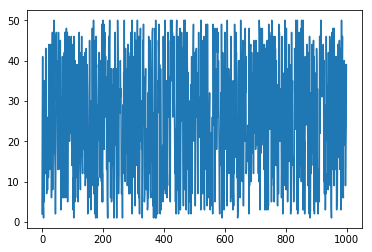

In [26]:
sales_data['units'].plot()
# pandas will interact with matplotlib  - don't even need to import matplotlib

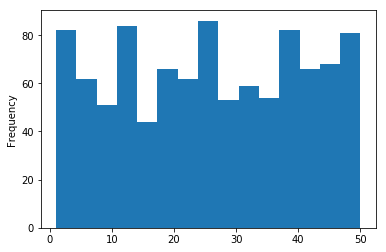

In [28]:
# A more helpful chart
sales_data['units'].plot.hist(bins=15);

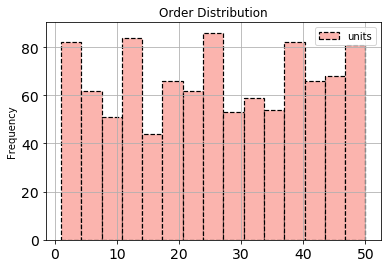

In [29]:
sales_data['units'].plot.hist(
    bins=15, 
    title="Order Distribution",
    legend=True,
    fontsize=14,
    colormap='Pastel1',
    grid=True,
    linestyle='--',
    edgecolor='black', 
    linewidth=1.2
);

In [30]:
tt = sales_data[['product', 'turnover']].groupby('product').sum()
tt

,turnover
product,
Corolla,53191480.51
Harry Potter book,51673.67
Lipitor,25435.05
PlayStation,718578.51
Rubik’s Cube,44957.49
Star Wars,28329.24
Thriller record,33806.96
banana,25690.00
iPad,2028467.59


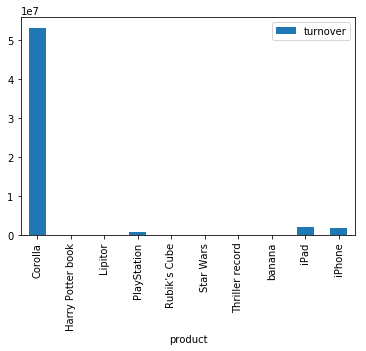

In [45]:
tt.plot.bar();

#### There are MANY more examples
- https://matplotlib.org/gallery.html
- https://seaborn.pydata.org/examples/index.html
- https://bokeh.pydata.org/en/latest/docs/gallery.html

# Closing remarks
1. Thank you all for coming to my classes
2. These lectures are nowhere close to comprehensive
3. The most important skill - Novel problem solving skills
4. Don't remember recipes - Remember what exists and what's possible
5. Google is invaluable